<a href="https://colab.research.google.com/github/rajendra11g/DL/blob/main/DeepAutoEncoderMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the dataset
(xtrain,ytrain), (xtest,ytest)=mnist.load_data()
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.
xtrain=xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))
xtest=xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print('xtrain shape is:',xtrain.shape)
print('xtest shape is:',xtest.shape)

xtrain shape is: (60000, 784)
xtest shape is: (10000, 784)


In [4]:
inputdim=28*28
latentdim=2

In [5]:
#Encoder
inputvec=Input(shape=(inputdim,))
enc1=Dense(512) (inputvec)
act1=Activation('relu') (enc1)
enc2=Dense(512) (act1)
bn1=BatchNormalization() (enc2)
act2=Activation('relu') (bn1)
d1=Dropout(0.2) (act2)

enc3=Dense(128) (d1)
act3=Activation('relu') (enc3)
enc4=Dense(128) (act3)
bn2=BatchNormalization() (enc4)
act4=Activation('relu') (bn2)
d2=Dropout(0.2) (act4)

enc5=Dense(32) (d2)
act5=Activation('relu') (enc5)
d3=Dropout(0.2) (act5)
enc6=Dense(latentdim) (d3)
bn3=BatchNormalization() (enc6)
encoder=Activation('relu') (bn3)

In [6]:
encode=Model(inputvec,encoder)

In [7]:
#Decoder
dec1=Dense(32) (encoder)
bn4=BatchNormalization() (dec1)
act6=Activation('relu') (bn4)

d4=Dropout(0.2) (act6)
dec2=Dense(128) (d4)
act7=Activation('relu') (dec2)
dec3=Dense(128) (act7)
bn5=BatchNormalization() (dec3)
act8=Activation('relu') (bn5)

d5=Dropout(0.2) (act8)
dec4=Dense(512) (d5)
act9=Activation('relu') (dec4)
dec5=Dense(512) (act9)
bn6=BatchNormalization() (dec5)
act10=Activation('relu') (bn6)
decoder=Dense(inputdim, activation='sigmoid') (act10)

In [8]:
autoencoder=Model(inputvec,decoder)
print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                           

In [9]:
opt=tf.keras.optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)

In [10]:
autoencoder.compile(loss='binary_crossentropy',optimizer=opt)

In [11]:
hist=autoencoder.fit(xtrain,xtrain,epochs=200,batch_size=512,shuffle=True, validation_data=(xtest,xtest))

Epoch 1/200
118/118 [==============================] - 18s 125ms/step - loss: 0.4249 - val_loss: 0.4366
Epoch 2/200
118/118 [==============================] - 15s 124ms/step - loss: 0.2516 - val_loss: 0.2498
Epoch 3/200
118/118 [==============================] - 16s 134ms/step - loss: 0.2287 - val_loss: 0.2284
Epoch 4/200
118/118 [==============================] - 15s 124ms/step - loss: 0.2199 - val_loss: 0.2181
Epoch 5/200
118/118 [==============================] - 15s 124ms/step - loss: 0.2140 - val_loss: 0.2103
Epoch 6/200
118/118 [==============================] - 15s 124ms/step - loss: 0.2104 - val_loss: 0.2045
Epoch 7/200
118/118 [==============================] - 15s 124ms/step - loss: 0.2081 - val_loss: 0.2020
Epoch 8/200
118/118 [==============================] - 14s 123ms/step - loss: 0.2062 - val_loss: 0.2005
Epoch 9/200
118/118 [==============================] - 14s 122ms/step - loss: 0.2049 - val_loss: 0.1989
Epoch 10/200
118/118 [==============================] - 14s 123m

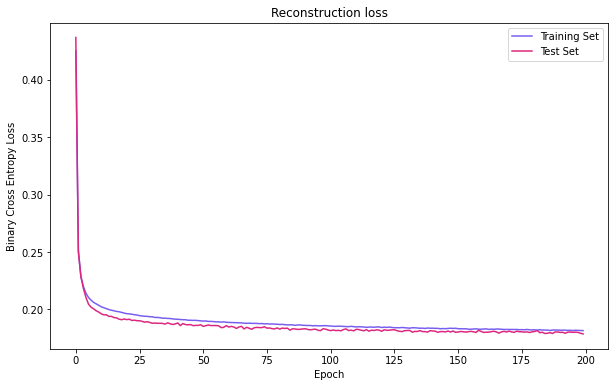

In [13]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [15]:
reconstructed=autoencoder.predict(xtest)

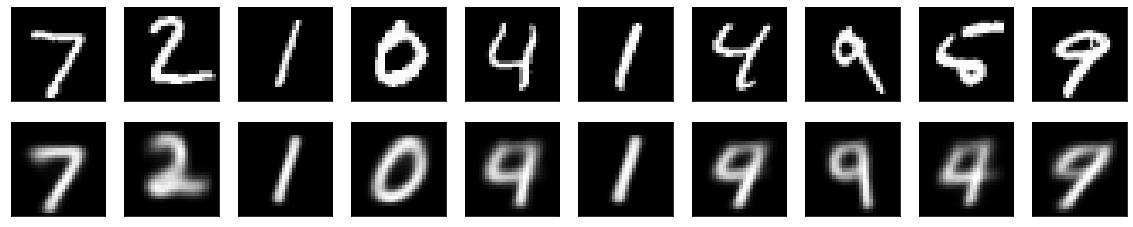

In [16]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()